In [ ]:
from criminologia_cdmx.etl import *
from pylab import rcParams
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from itertools import product
from tqdm import tqdm_notebook
import numpy as np
import pandas as pd

In [ ]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Cargar datos

In [ ]:
carpetas = get_historico_carpetas()
carpetas = agregar_categorias_de_usuario(carpetas)
serie = serie_de_tiempo_categoria(carpetas, pd.to_datetime('01/01/2016'), 'Robo a pasajero')
serie

/tmp/ipykernel_6525/1593685181.py:1: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  carpetas = get_historico_carpetas()


,fecha_hechos,Robo a pasajero
0,2016-01-31,310
1,2016-02-29,266
2,2016-03-31,275
3,2016-04-30,320
4,2016-05-31,258
...,...,...
62,2021-03-31,493
63,2021-04-30,472
64,2021-05-31,500
65,2021-06-30,436


<AxesSubplot:xlabel='fecha_hechos'>

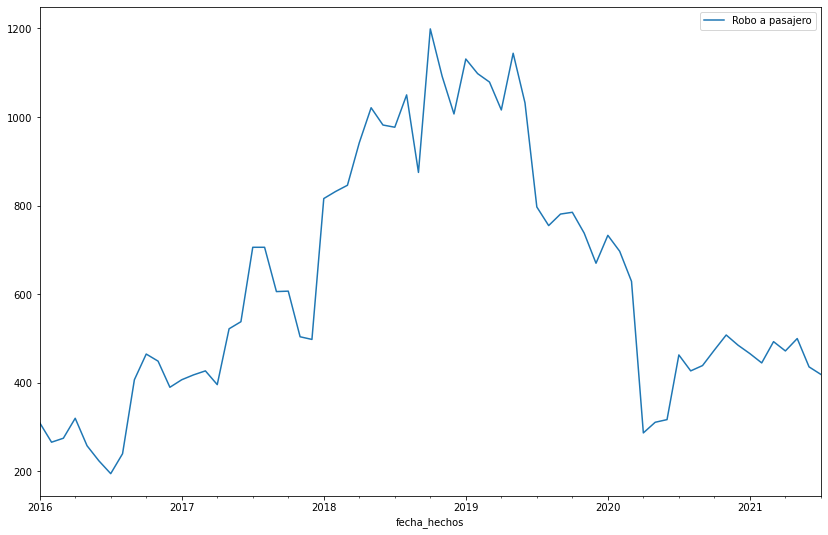

In [ ]:
serie.set_index('fecha_hechos').plot(figsize=(14,9))

## Descomposición

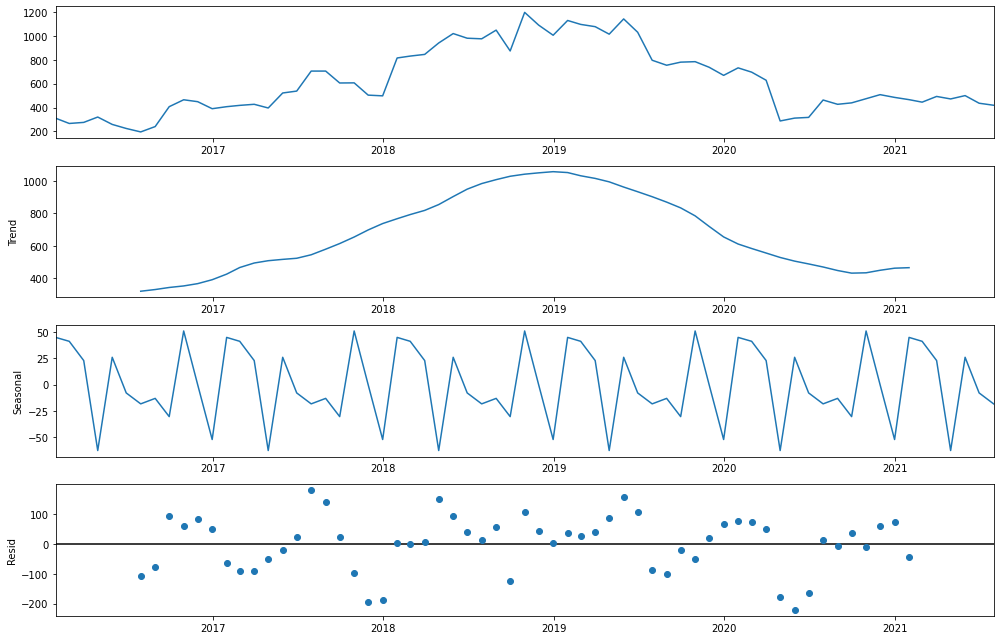

In [ ]:
rcParams['figure.figsize'] = (14, 9)
decomposition = sm.tsa.seasonal_decompose(serie.set_index('fecha_hechos'), model='additive')
fig = decomposition.plot()
plt.show()

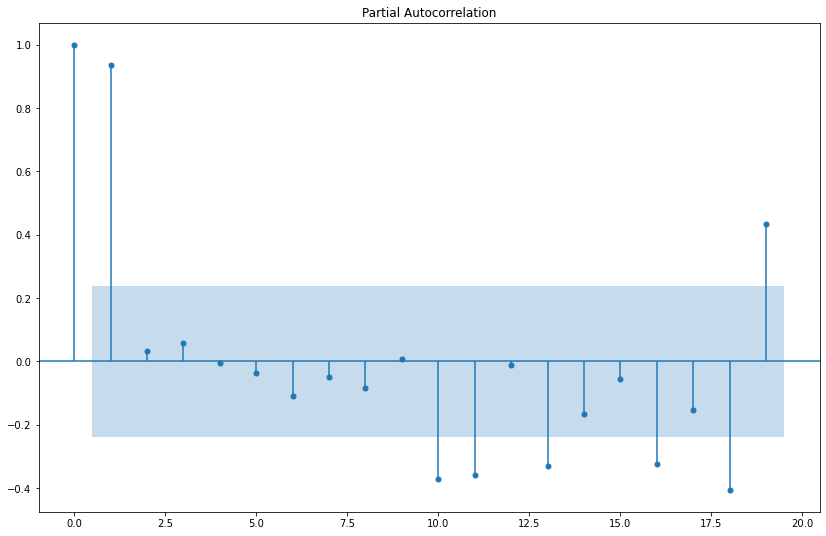

In [ ]:
plot_pacf(serie.set_index('fecha_hechos'));

## Dickey-Fuller

In [ ]:
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

print(adf_test(serie.set_index('fecha_hechos')))                                             

Results of Dickey-Fuller Test:
Test Statistic                 -1.608455
p-value                         0.479345
#Lags Used                      0.000000
Number of Observations Used    66.000000
Critical Value (1%)            -3.533560
Critical Value (5%)            -2.906444
Critical Value (10%)           -2.590724
dtype: float64
None


## Ajuste de tendencia

<AxesSubplot:xlabel='fecha_hechos'>

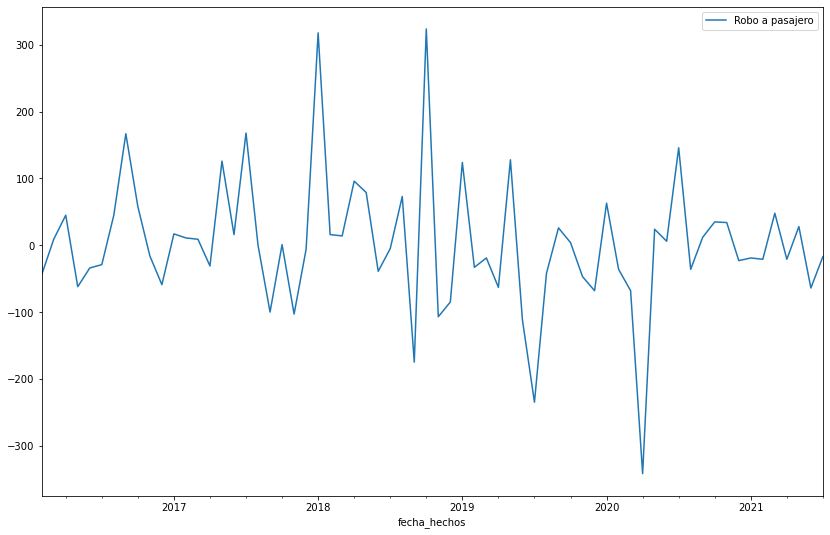

In [ ]:
serie_adj = serie.set_index('fecha_hechos') - serie.set_index('fecha_hechos').shift(1)
serie_adj = serie_adj.dropna()
serie_adj.plot(figsize=(14,9))

In [ ]:
print(adf_test(serie_adj))

Results of Dickey-Fuller Test:
Test Statistic                -8.726779e+00
p-value                        3.272377e-14
#Lags Used                     0.000000e+00
Number of Observations Used    6.500000e+01
Critical Value (1%)           -3.535217e+00
Critical Value (5%)           -2.907154e+00
Critical Value (10%)          -2.591103e+00
dtype: float64
None


## Estacional

<AxesSubplot:xlabel='fecha_hechos'>

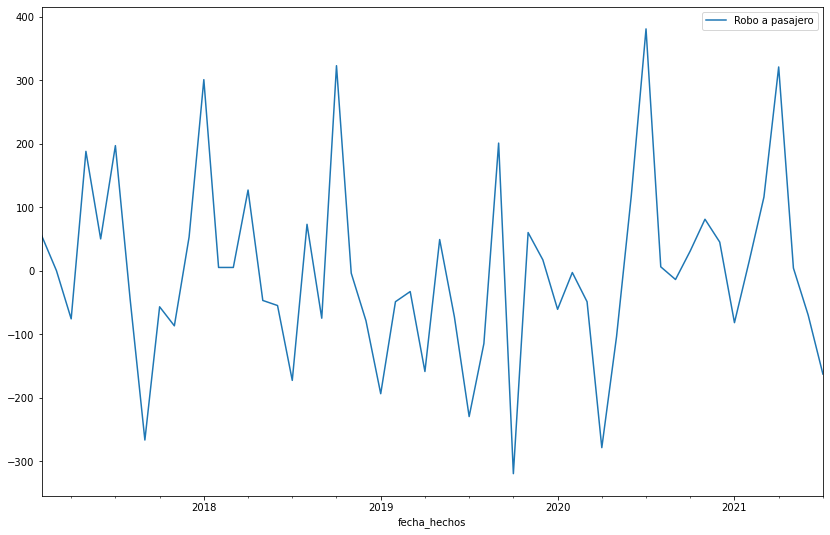

In [ ]:
serie_adj = serie_adj - serie_adj.shift(12)
serie_adj = serie_adj.dropna()
serie_adj.plot()

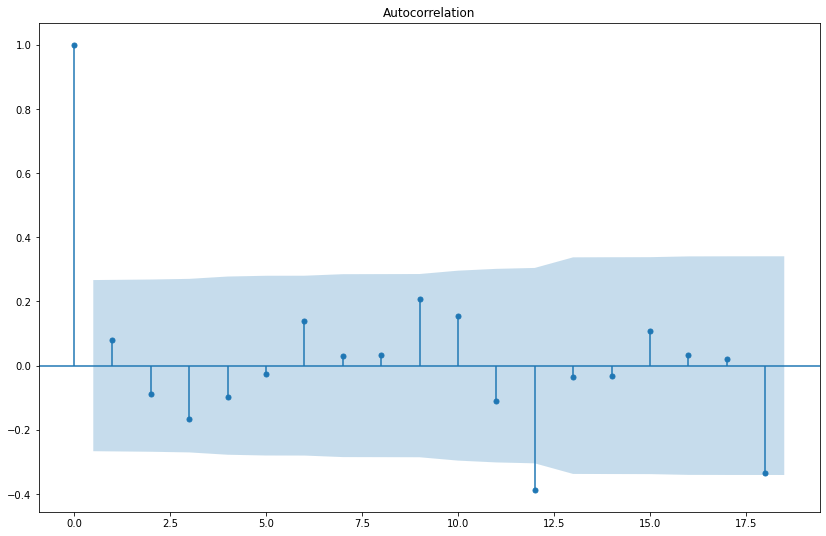

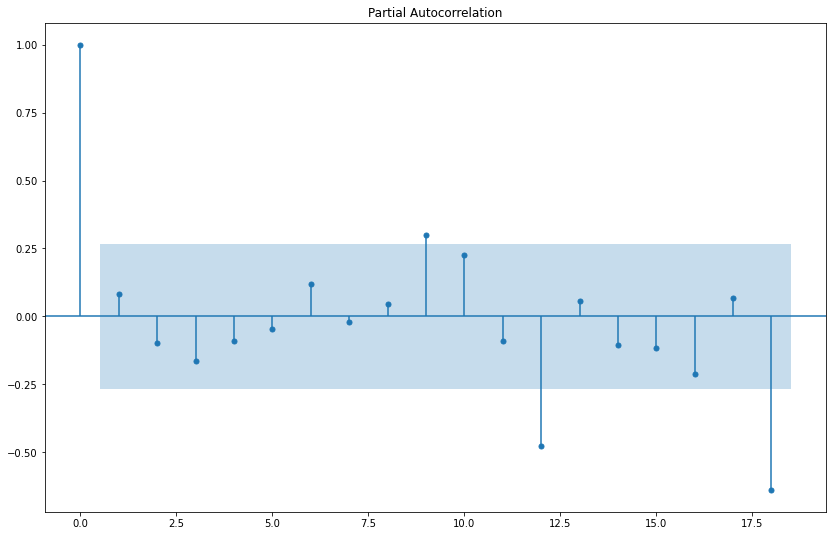

In [ ]:
plot_acf(serie_adj)
plt.show()
plot_pacf(serie_adj)
plt.show()